In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from glob import glob
from scipy.signal import medfilt

import sys
sys.path.append("/Users/alex_wheelis/Documents/programming/red_wolf_detection/backend/algo_dev")
from misc import *

In [27]:
wolf_dir = "/Users/alex_wheelis/Documents/Fall2022/ECE 484/DCIM/100_BTCF"

wolf_vid_fs = glob(wolf_dir + "/*")

test_vid_f = wolf_vid_fs[RANDOM_IDX]

In [28]:
test_vid_f

'/Users/alex_wheelis/Documents/Fall2022/ECE 484/DCIM/100_BTCF/IMG_0186.MP4'

In [29]:
"""
1) load video
2) absolute difference 
3) threshold 
"""

'\n1) load video\n2) absolute difference \n3) threshold \n'

'/Users/alex_wheelis/Documents/Fall2022/ECE 484/DCIM/100_BTCF/IMG_0008.MP4'

In [37]:
vid = load_video(wolf_vid_fs[40], frames = 2000)

In [38]:
vid = decrease_res_by_x(vid, int(vid.shape[2]/4), int(vid.shape[1]/4))
vid = vid.astype(np.int16)

In [39]:
diff_activation = np.zeros(vid.shape[0], dtype = np.int16)
diff_activation.shape

(2000,)

In [55]:
diff_v = np.zeros(vid.shape, dtype = np.int16)
ws = 1 # window size
for i in range(0, vid.shape[0]-2*ws):
    med2 = np.median(vid[i+ws:i+(2*ws), ...], axis=0)
    med1 = np.median(vid[i:i+ws, ...], axis=0)
    diff_f = med2-med1
    diff_f[diff_f < 20] = 0
    diff_v[i] = np.abs(diff_f)
    diff_activation[i] = np.sum(diff_v[i])
    
    

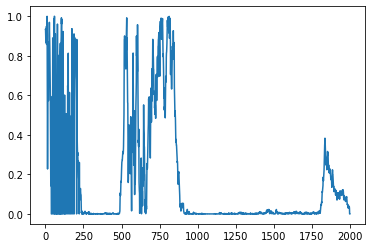

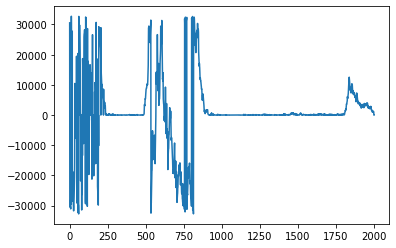

In [54]:
# get rid of noise with high pass filter

act_fft = np.fft.fft(diff_activation)
act_fft_abs = np.abs(act_fft)

act_min = np.min(act_fft_abs)
act_max = np.max(act_fft_abs)

highpass = act_fft.copy()
lowpass = act_fft.copy()

# these numbers are ARBITRARY please help!!!
lowpass[act_fft_abs > act_min * 5] = 0
# .04 works
highpass[act_fft_abs < act_max * .001] = 0


new_act = np.fft.ifft(highpass)

new_act = linear_normalization(np.abs(new_act))

plt.plot(new_act)
plt.show()
plt.plot(diff_activation)
plt.show()

In [42]:
save_video_w_mvmt_annotations(vid, new_act, "is_wolf")

/Users/alex_wheelis/Documents/programming/red_wolf_detection/backend/algo_dev/video/is_wolf.mp4


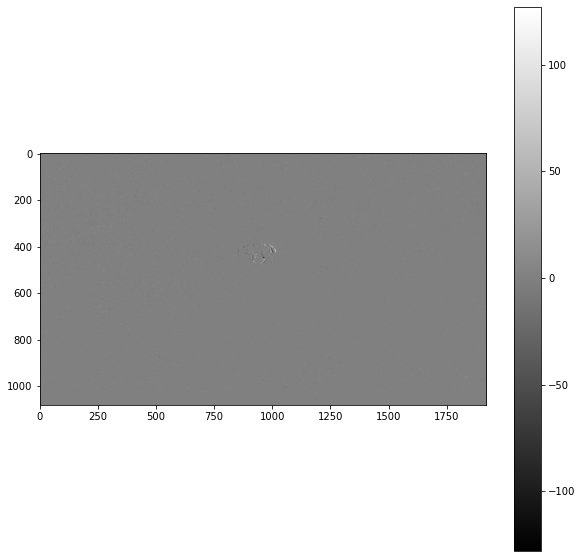

In [100]:
plt.figure(figsize = (10, 10))
diff_f = vid[6, ...] - vid[5, ...]
clipped = clip_img(diff_f, 90, 10)
plt.imshow(diff_f, cmap = 'gray')
plt.colorbar()

(array([[748.,   1.,   0., ...,   0.,   0., 331.],
        [755.,   0.,   0., ...,   0.,   0., 325.],
        [757.,   0.,   0., ...,   0.,   0., 323.],
        ...,
        [791.,   0.,   0., ...,   0.,   0., 289.],
        [787.,   0.,   0., ...,   0.,   0., 293.],
        [747.,   0.,   0., ...,   0.,   0., 333.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 1920 BarContainer objects>)

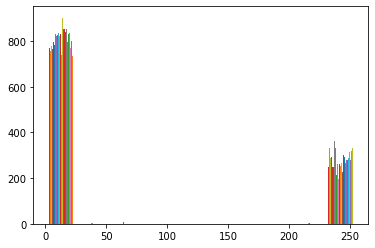

In [53]:
plt.hist(diff_f)


In [42]:
save_video(vid,"slowmo", fps = 10)

/Users/alex_wheelis/Documents/programming/red_wolf_detection/backend/algo_dev/video/slowmo.mp4


In [33]:
save_video(diff_v,"slowmo_d", fps = 10)

/Users/alex_wheelis/Documents/programming/red_wolf_detection/backend/algo_dev/video/slowmo_d.mp4
